In [107]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [108]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [109]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

In [110]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [111]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [112]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [113]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [114]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

In [115]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [116]:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [117]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [118]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [119]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

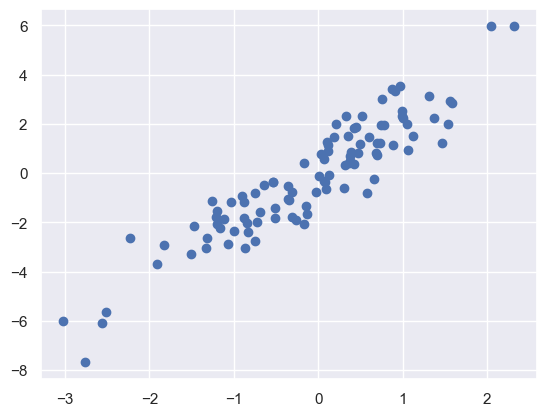

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);
plt.show()

In [121]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([67,  7, 60, 78, 50, 17, 22, 15,  9, 51, 70, 81, 79,  3, 45, 11, 71,
       84, 40, 72])

In [122]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([ 5, 24, 92, 68, 90, 95, 87, 79, 11, 74, 10, 89, 29, 57, 46, 55, 47,
       37, 50, 28])

In [123]:
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

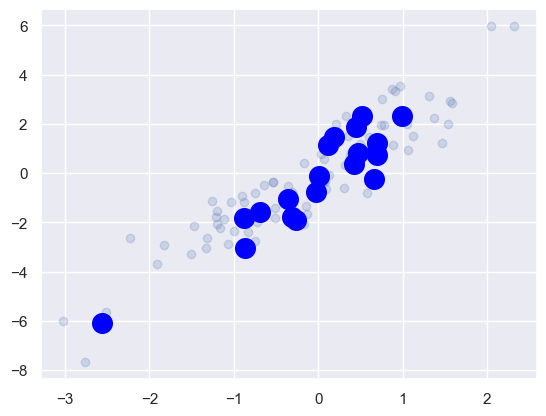

In [124]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='blue', s=200);
plt.show()

In [125]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [126]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [127]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [128]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [129]:
x = np.zeros(10)
np.add.at(x, i, 2)
print(x)

[0. 0. 2. 4. 6. 0. 0. 0. 0. 0.]


In [130]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-4, 4, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

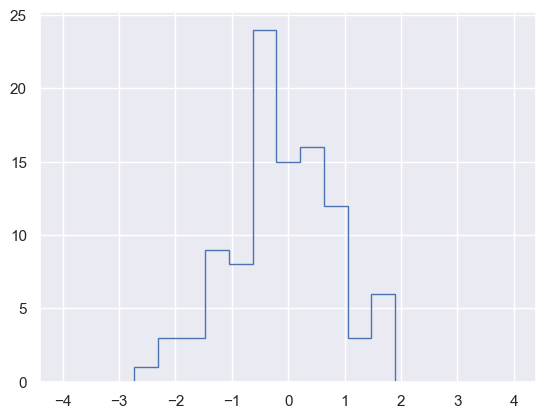

In [131]:
# plot the results
# plt.plot(bins, counts, linestyle='--');
# same effect with the top one
plt.hist(x, bins, histtype='step');

plt.show()

In [132]:
# speed comparison

In [133]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
7.33 μs ± 134 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Custom routine:
7.87 μs ± 21.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [134]:
x = np.random.randn(1000000)
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
i = np.searchsorted(bins, x, side='right') - 1
i = np.clip(i, 0, counts.size - 1)
%timeit np.add.at(counts, i, 1)


NumPy routine:
56 ms ± 75.7 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
36.8 ms ± 372 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
